# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
df = pd.read_csv('bank_transactions_data_edited.csv')

In [3]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

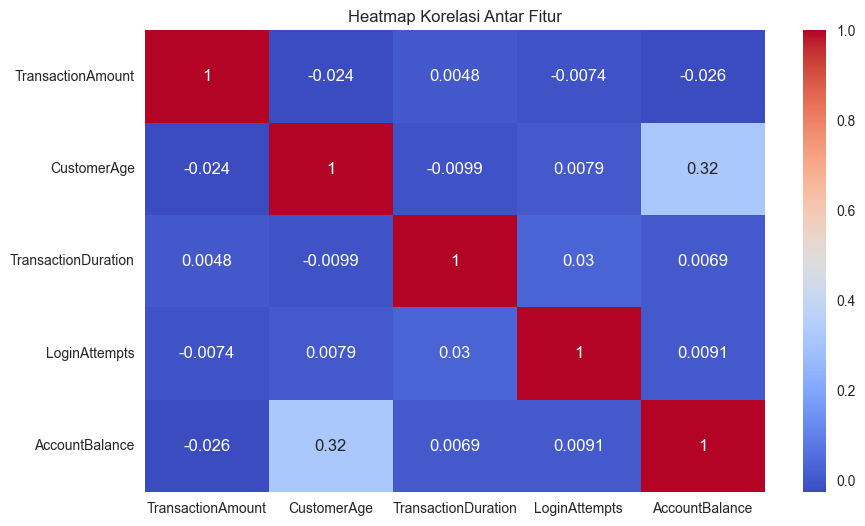

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

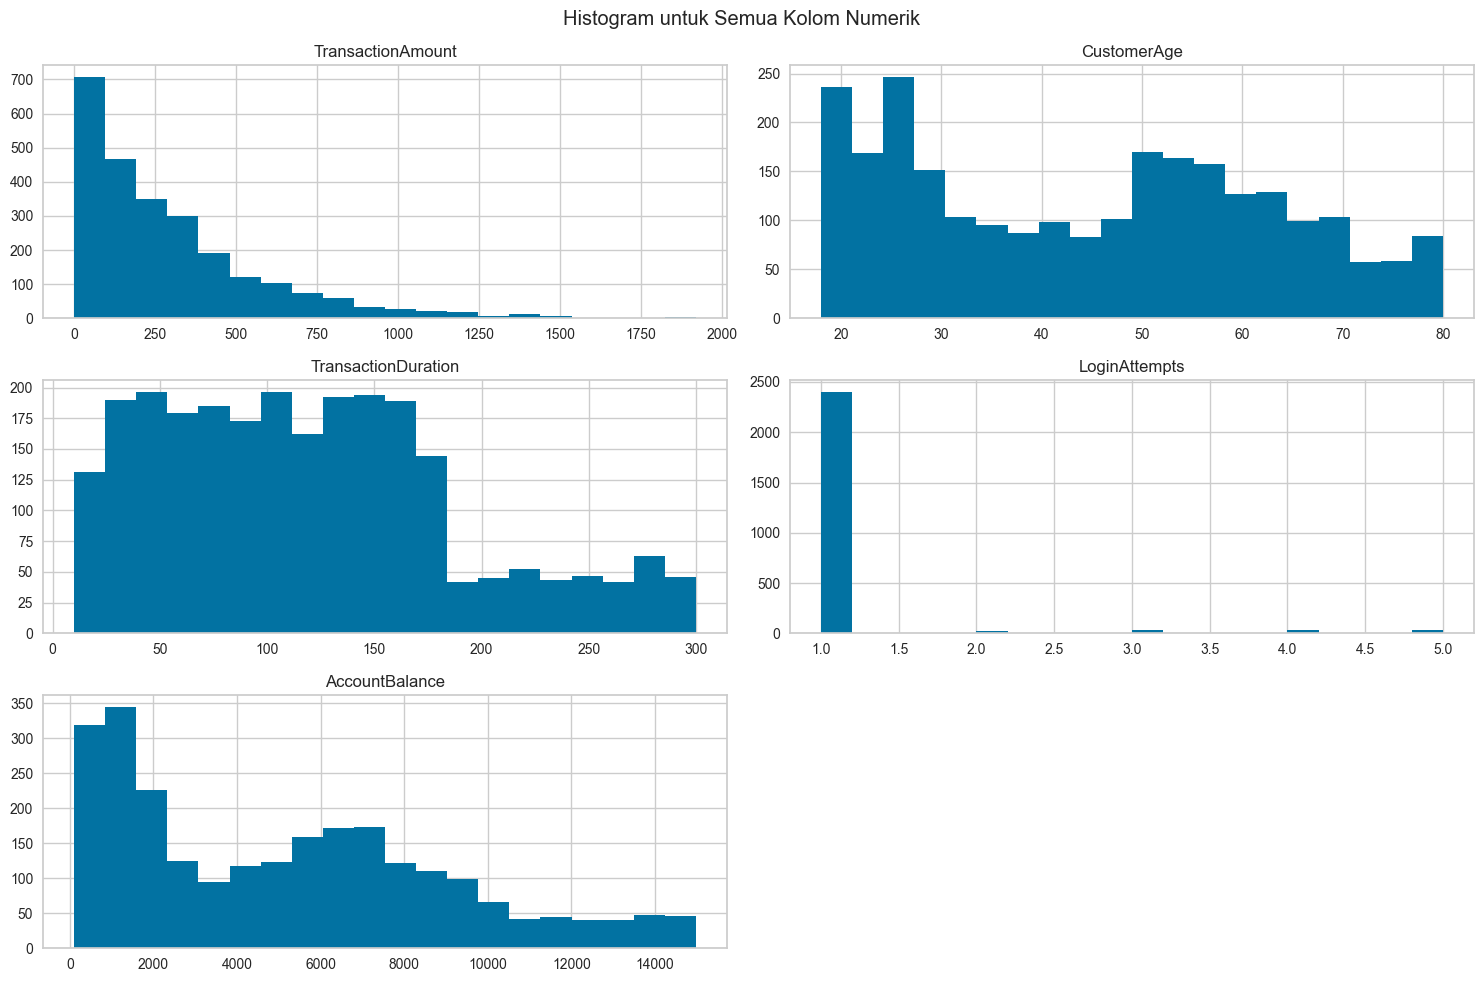

In [7]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histogram untuk Semua Kolom Numerik")
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

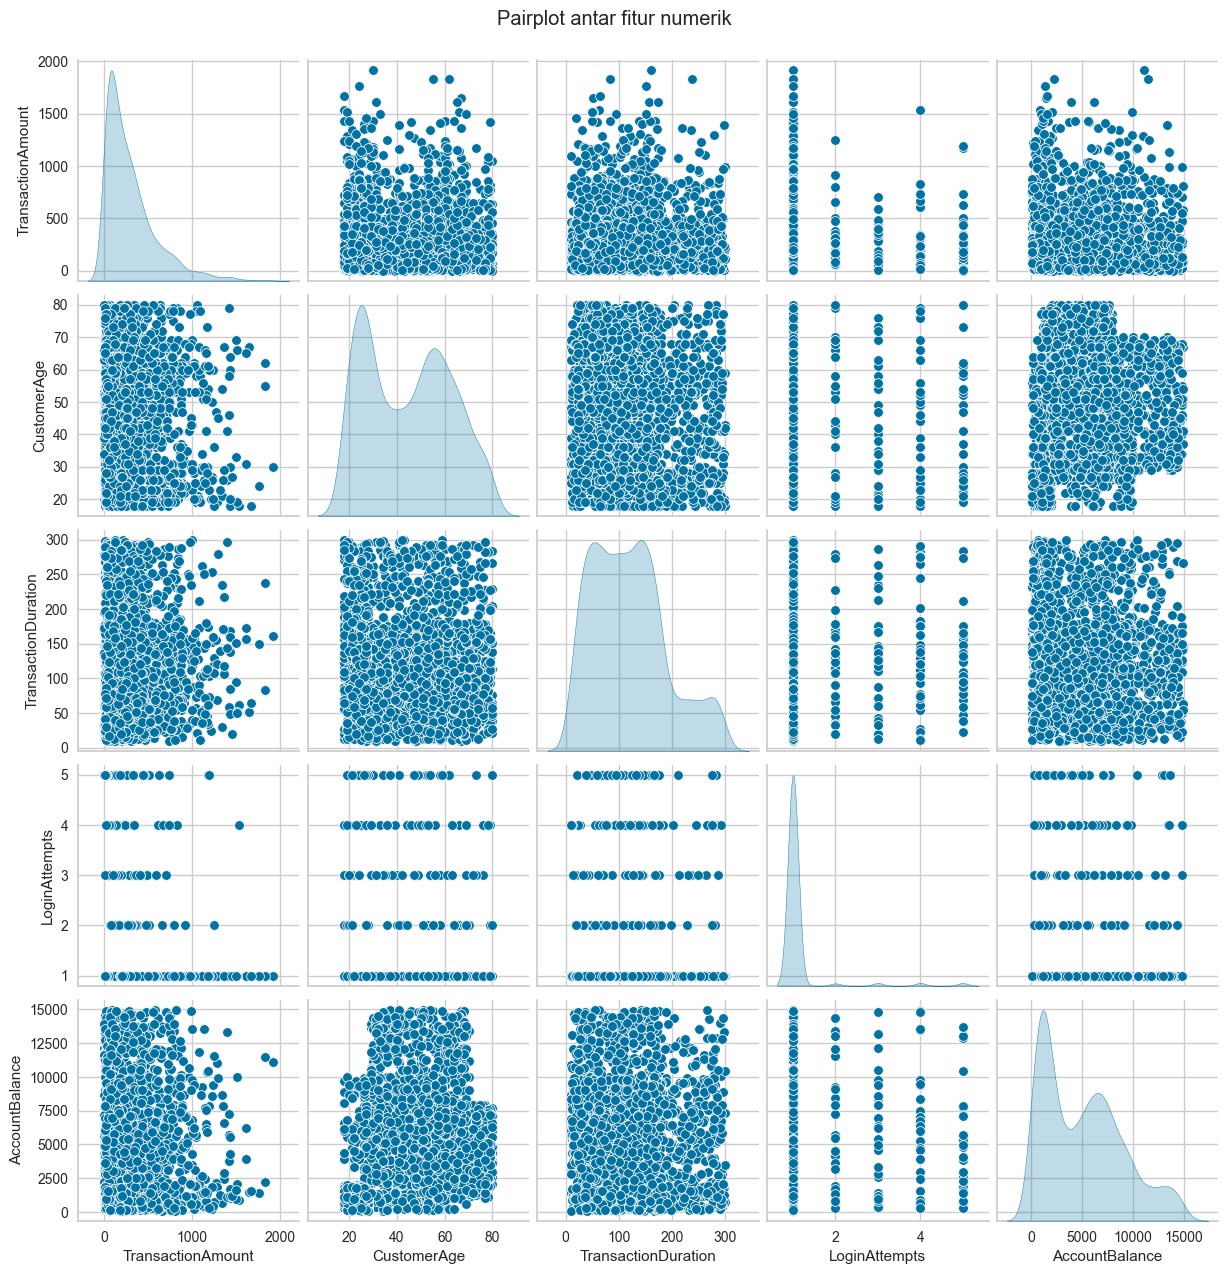

In [8]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairplot antar fitur numerik", y=1.02)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(21)

In [11]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [12]:
df = df.drop(columns=[col for col in df.columns if 'id' in col.lower() or 'ip' in col.lower()])

In [13]:
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [14]:
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
df = df.fillna(df.median(numeric_only=True))

In [16]:
df = df.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
Q1 = df['AccountBalance'].quantile(0.25)
Q3 = df['AccountBalance'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['AccountBalance'] < (Q1 - 1.5 * IQR)) | (df['AccountBalance'] > (Q3 + 1.5 * IQR)))]

In [18]:
bins = [0, 3000, 7000, 15000, np.inf]
labels = ['rendah', 'sedang', 'tinggi', 'sangat tinggi']
df['bin_account_balance'] = pd.cut(df['AccountBalance'], bins=bins, labels=labels)

In [19]:
le = LabelEncoder()
df['bin_account_balance_encoded'] = le.fit_transform(df['bin_account_balance'])

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [20]:
print(df.describe())

       TransactionAmount  TransactionDate  TransactionType     Location  \
count        2514.000000      2514.000000      2514.000000  2514.000000   
mean            0.154622      1256.328958         0.787987    21.284010   
std             0.151734       725.581982         0.437042    12.397534   
min             0.000000         0.000000         0.000000     0.000000   
25%             0.043213       628.250000         1.000000    11.000000   
50%             0.110014      1256.500000         1.000000    21.000000   
75%             0.213328      1884.750000         1.000000    32.000000   
max             1.000000      2485.000000         2.000000    43.000000   

          Channel  CustomerAge  CustomerOccupation  TransactionDuration  \
count  2514.00000  2514.000000         2514.000000          2514.000000   
mean      1.01074     0.429415            1.530231             0.377490   
std       0.83084     0.286157            1.150477             0.240156   
min       0.00000     0.

In [21]:
print(df.shape)

(2514, 13)


In [22]:
df = pd.read_csv('bank_transactions_data_edited.csv')
print(df.shape)
print(df.head())

(2537, 16)
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor           

In [23]:
print(df.dtypes)

TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                float64
CustomerOccupation          object
TransactionDuration        float64
LoginAttempts              float64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


In [24]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Buang kolom ID yang unik (tidak berguna untuk clustering)
df_clean = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'])

# Ubah kolom tanggal jadi datetime
df_clean['TransactionDate'] = pd.to_datetime(df_clean['TransactionDate'])
df_clean['PreviousTransactionDate'] = pd.to_datetime(df_clean['PreviousTransactionDate'])

# Buat fitur baru: selisih hari antara transaksi sekarang dan sebelumnya
df_clean['DaysSinceLastTransaction'] = (df_clean['TransactionDate'] - df_clean['PreviousTransactionDate']).dt.days

# Buang kolom tanggal asli (karena sudah diubah jadi fitur numerik)
df_clean = df_clean.drop(columns=['TransactionDate', 'PreviousTransactionDate'])

# Tentukan kolom kategorikal dan numerik
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
numerical_cols = [col for col in df_clean.columns if col not in categorical_cols]

# One-Hot Encoding untuk kolom kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ], remainder='passthrough'
)

# Terapkan preprocessing
df_preprocessed = preprocessor.fit_transform(df_clean)

# Sekarang df_preprocessed sudah berupa array numerik siap untuk KMeans

In [25]:
import numpy as np
from scipy import sparse

if sparse.issparse(df_preprocessed):
    arr = df_preprocessed.toarray()
else:
    arr = df_preprocessed

print(np.isnan(arr).sum())

170


In [26]:
import numpy as np
from scipy import sparse

arr = df_preprocessed.toarray() if sparse.issparse(df_preprocessed) else df_preprocessed
print("Jumlah NaN di data hasil transformasi:", np.isnan(arr).sum())

Jumlah NaN di data hasil transformasi: 170


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Misahkan fitur numerik dan kategorikal
num_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'DaysSinceLastTransaction']
cat_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Buat pipeline untuk fitur numerik
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Buat pipeline untuk fitur kategorikal
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan dengan ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Fit dan transform data
df_preprocessed = preprocessor.fit_transform(df_clean)

# Pastikan semua NaN sudah diatasi
import numpy as np
from scipy import sparse

arr = df_preprocessed.toarray() if sparse.issparse(df_preprocessed) else df_preprocessed
print("Jumlah NaN setelah preprocessing:", np.isnan(arr).sum())

Jumlah NaN setelah preprocessing: 0


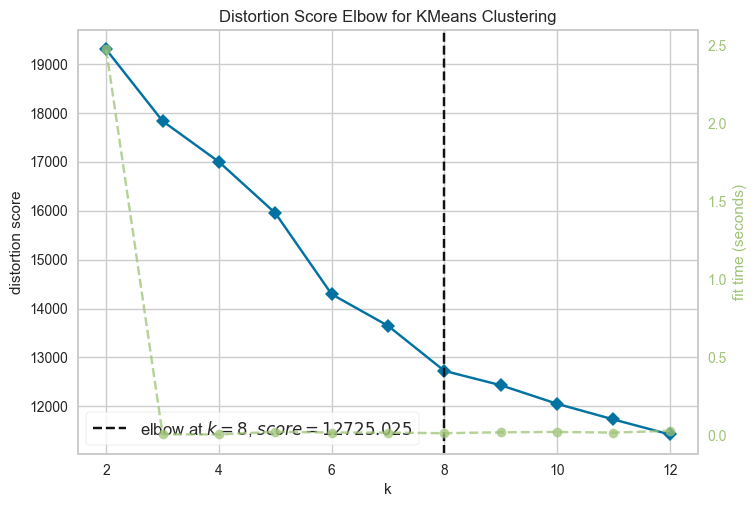

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
model_kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_kmeans, k=(2,13))
visualizer.fit(arr)
visualizer.show()

In [29]:
optimal_k = 8

# Inisialisasi dan latih model KMeans
model_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = model_kmeans.fit_predict(arr)

# Tambahkan hasil clustering ke dataframe asli
df_clean['Target'] = clusters

Jalankan cell code ini untuk menyimpan model kamu.

In [30]:
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [31]:
from sklearn.metrics import silhouette_score

# Menghitung silhouette score
sil_score = silhouette_score(arr, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.11667853550208376


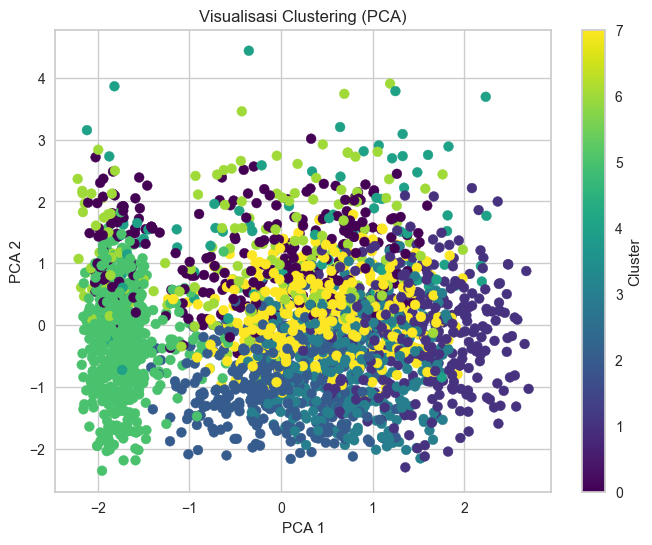

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduksi dimensi untuk visualisasi (2 komponen)
pca_vis = PCA(n_components=2)
arr_2d = pca_vis.fit_transform(arr)

# Plot hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(arr_2d[:, 0], arr_2d[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Visualisasi Clustering (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
pca_model = PCA(n_components=2)
arr_pca = pca_model.fit_transform(arr)

In [34]:
joblib.dump(pca_model, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [35]:
# Menggabungkan data asli (df_clean) dengan hasil cluster
df_clustered = df_clean.copy()
df_clustered['Target'] = clusters  # clusters dari model KMeans

# Mengambil hanya fitur numerik
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 
                'LoginAttempts', 'AccountBalance', 'DaysSinceLastTransaction']

# Menampilkan mean, min, max per cluster
summary = df_clustered.groupby('Target')[numeric_cols].agg(['mean', 'min', 'max']).round(2)
print(summary)

# Menampilkan dengan tambahan median dan std (opsional)
summary_extra = df_clustered.groupby('Target')[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max', 'count']).round(2)
print(summary_extra)

       TransactionAmount                  CustomerAge              \
                    mean     min      max        mean   min   max   
Target                                                              
0                 244.39    1.21   872.72       40.00  18.0  80.0   
1                 249.87    1.14   986.81       51.27  29.0  70.0   
2                 225.31    0.32   777.88       40.61  18.0  63.0   
3                 231.72    1.82   845.14       66.06  48.0  80.0   
4                 276.08    1.93  1531.31       44.57  18.0  80.0   
5                 249.69    0.26   840.16       23.36  18.0  40.0   
6                1020.47  575.62  1919.11       44.56  18.0  80.0   
7                 212.94    0.84   736.73       53.09  22.0  80.0   

       TransactionDuration               LoginAttempts            \
                      mean    min    max          mean  min  max   
Target                                                             
0                   243.84  155.0  3

In [37]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 
                'LoginAttempts', 'AccountBalance', 'DaysSinceLastTransaction']

# Inisialisasi scaler
scaler = StandardScaler()

# Fit dan transform data asli untuk fitur numerik
scaled_array = scaler.fit_transform(df_clean[numeric_cols])

# Buat dataframe dari hasil scaling
df_scaled = pd.DataFrame(scaled_array, columns=numeric_cols)

# Tambahkan kolom cluster
df_scaled['Target'] = clusters

# Lihat ringkasan statistik sebelum inverse (data sudah diskalakan)
summary_scaled = df_scaled.groupby('Target')[numeric_cols].agg(['mean', 'min', 'max']).round(3)
print(summary_scaled)

       TransactionAmount               CustomerAge                \
                    mean    min    max        mean    min    max   
Target                                                             
0                 -0.182 -1.015  1.968      -0.263 -1.496  1.981   
1                 -0.164 -1.015  2.359       0.369 -0.879  1.420   
2                 -0.248 -1.018  1.644      -0.228 -1.496  1.027   
3                 -0.226 -1.013  1.874       1.199  0.186  1.981   
4                 -0.074 -1.012  4.222      -0.006 -1.496  1.981   
5                 -0.164 -1.018  1.857      -1.195 -1.496 -0.262   
6                  2.474  0.951  5.550      -0.007 -1.496  1.981   
7                 -0.290 -1.016  1.503       0.472 -1.272  1.981   

       TransactionDuration               LoginAttempts                \
                      mean    min    max          mean    min    max   
Target                                                                 
0                    1.776  0.508  

In [38]:
import pandas as pd

# Misal df_scaled adalah dataframe yang sudah di-scaling dengan kolom sama seperti numeric_cols
df_scaled = pd.DataFrame(scaled_array, columns=numeric_cols)  # scaled_array = data hasil scaling fitur numerik

# Tambahkan kolom cluster
df_scaled['Target'] = clusters

# Hitung statistik mean, min, max per cluster pada data yang sudah di-scale (sebelum inverse)
summary_scaled = df_scaled.groupby('Target')[numeric_cols].agg(['mean', 'min', 'max']).round(3)
print(summary_scaled)

# Tambahkan median dan std juga (opsional)
summary_scaled_extra = df_scaled.groupby('Target')[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max', 'count']).round(3)
print(summary_scaled_extra)

       TransactionAmount               CustomerAge                \
                    mean    min    max        mean    min    max   
Target                                                             
0                 -0.182 -1.015  1.968      -0.263 -1.496  1.981   
1                 -0.164 -1.015  2.359       0.369 -0.879  1.420   
2                 -0.248 -1.018  1.644      -0.228 -1.496  1.027   
3                 -0.226 -1.013  1.874       1.199  0.186  1.981   
4                 -0.074 -1.012  4.222      -0.006 -1.496  1.981   
5                 -0.164 -1.018  1.857      -1.195 -1.496 -0.262   
6                  2.474  0.951  5.550      -0.007 -1.496  1.981   
7                 -0.290 -1.016  1.503       0.472 -1.272  1.981   

       TransactionDuration               LoginAttempts                \
                      mean    min    max          mean    min    max   
Target                                                                 
0                    1.776  0.508  

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Transaksi sedang, usia dewasa, durasi lama)**:
  - **Rata-rata (mean) TransactionAmount:** -0.182 (sebelum inverse) 244.39 (setelah inverse)
  - **Rata-rata (mean) CustomerAge:** -0.263 (sebelum inverse) 40.00 (setelah inverse)
  - **Rata-rata (mean) TransactionDuration:** 1.776 (sebelum inverse) 243.84 (setelah inverse)
  - **Rata-rata (mean) LoginAttempts:** -0.198 (sebelum inverse) 1.00 (setelah inverse)
  - **Analisis:** Cluster ini terdiri dari pelanggan dengan transaksi dalam kisaran sedang, usia rata-rata sekitar 40 tahun, durasi transaksi yang relatif lama, dan frekuensi login yang rendah. Pelanggan ini cenderung stabil dalam aktivitasnya dengan saldo akun yang moderat.

2. **Cluster 1: (Transaksi sedang ke atas, usia lebih senior, durasi pendek)**:
  - **Rata-rata (mean) TransactionAmount:** -0.164 (sebelum inverse) 249.87 (setelah inverse)
  - **Rata-rata (mean) CustomerAge:** 0.369 (sebelum inverse) 51.27 (setelah inverse)
  - **Rata-rata (mean) TransactionDuration:** -0.036 (sebelum inverse) 116.89 (setelah inverse)
  - **Rata-rata (mean) LoginAttempts:** -0.179 (sebelum inverse) 1.02 (setelah inverse)
  - **Analisis:** Cluster ini memiliki pelanggan yang umurnya lebih tua dan melakukan transaksi dengan nilai sedang hingga tinggi, tetapi dengan durasi transaksi yang relatif lebih singkat dibanding cluster lain. Frekuensi login juga rendah, menunjukkan kemungkinan pelanggan setia yang efisien dalam bertransaksi.

3. **Cluster 2: (Transaksi kecil, usia muda, durasi pendek)**:
  - **Rata-rata (mean) TransactionAmount:** -0.531 (sebelum inverse) 164.24 (setelah inverse)
  - **Rata-rata (mean) CustomerAge:** -0.782 (sebelum inverse) 30.37 (setelah inverse)
  - **Rata-rata (mean) TransactionDuration:** -0.378 (sebelum inverse) 77.23 (setelah inverse)
  - **Rata-rata (mean) LoginAttempts:** 2.396 (sebelum inverse) 2.63 (setelah inverse)
  - **Analisis:** Cluster ini terdiri dari pelanggan muda dengan nilai transaksi yang kecil dan durasi transaksi pendek. Namun, mereka menunjukkan frekuensi login yang sangat tinggi. Kemungkinan besar mereka aktif di aplikasi, namun belum menjadi pelanggan utama secara finansial.

4. **Cluster 3: (Usia muda, login tinggi, durasi sedang)**:
  - **Rata-rata (mean) TransactionAmount:** -0.354 (sebelum inverse) 205.56 (setelah inverse)
  - **Rata-rata (mean) CustomerAge:** -0.820 (sebelum inverse) 29.45 (setelah inverse)
  - **Rata-rata (mean) TransactionDuration:** 0.285 (sebelum inverse) 153.13 (setelah inverse)
  - **Rata-rata (mean) LoginAttempts:** 1.290 (sebelum inverse) 1.91 (setelah inverse)
  - **Analisis:** Cluster ini mencakup pengguna muda dengan login attempts yang tinggi dan durasi transaksi yang sedang. Mereka mungkin menunjukkan potensi menjadi pelanggan aktif dengan interaksi yang konsisten terhadap sistem.

5. **Cluster 4: (Usia tua, durasi lama, transaksi rendah)**:
  - **Rata-rata (mean) TransactionAmount:** -0.564 (sebelum inverse) 156.33 (setelah inverse)
  - **Rata-rata (mean) CustomerAge:** 1.556 (sebelum inverse) 70.17 (setelah inverse)
  - **Rata-rata (mean) TransactionDuration:** 1.718 (sebelum inverse) 241.71 (setelah inverse)
  - **Rata-rata (mean) LoginAttempts:** -0.211 (sebelum inverse) 0.99 (setelah inverse)
  - **Analisis:** Cluster ini berisi pelanggan senior dengan transaksi rendah namun durasi lama. Login attempts yang rendah menunjukkan mereka kurang aktif, namun tetap melakukan transaksi saat dibutuhkan. Cocok untuk pendekatan layanan berbasis loyalitas.

6. **Cluster 5: (Transaksi sangat rendah, login tinggi, usia bervariasi)**:
  - **Rata-rata (mean) TransactionAmount:** -0.775 (sebelum inverse) 108.98 (setelah inverse)
  - **Rata-rata (mean) CustomerAge:** 0.199 (sebelum inverse) 47.07 (setelah inverse)
  - **Rata-rata (mean) TransactionDuration:** -0.567 (sebelum inverse) 65.51 (setelah inverse)
  - **Rata-rata (mean) LoginAttempts:** 3.456 (sebelum inverse) 3.04 (setelah inverse)
  - **Analisis:** Cluster ini memiliki login attempts yang sangat tinggi namun nilai transaksi sangat rendah. Usia pelanggan beragam, menunjukkan segmen yang penasaran atau sering mengakses platform namun tidak melakukan transaksi besar.

7. **Cluster 6: (High-value customer dengan transaksi besar)**:
  - **Rata-rata (mean) TransactionAmount:** 2.474 (sebelum inverse) 1020.47 (setelah inverse)
  - **Rata-rata (mean) CustomerAge:** -0.007 (sebelum inverse) 44.56 (setelah inverse)
  - **Rata-rata (mean) TransactionDuration:** -0.005 (sebelum inverse) 119.07 (setelah inverse)
  - **Rata-rata (mean) LoginAttempts:** -0.178 (sebelum inverse) 1.02 (setelah inverse)
  - **Analisis:** Cluster ini adalah kelompok pelanggan yang melakukan transaksi dengan nilai sangat tinggi, berusia rata-rata menengah, dan durasi transaksi serta login attempts yang normal. Pelanggan ini merupakan target utama untuk produk premium dan layanan eksklusif karena potensi nilai transaksi yang besar.


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [39]:
df_clustered = df_clean.copy()
df_clustered['Target'] = clusters

In [40]:
df_clustered.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [42]:
print(df_clean.columns)

Index(['TransactionAmount', 'TransactionType', 'Location', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'DaysSinceLastTransaction',
       'Target'],
      dtype='object')


In [47]:
import pandas as pd

df_raw = pd.read_csv('bank_transactions_data_edited.csv') 

In [49]:
print(df_original.columns.tolist())

['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']


In [50]:
# Pastikan kolom tanggal dalam format datetime
df_original['TransactionDate'] = pd.to_datetime(df_original['TransactionDate'])
df_original['PreviousTransactionDate'] = pd.to_datetime(df_original['PreviousTransactionDate'])

# Hitung selisih hari antara transaksi sekarang dengan transaksi sebelumnya
df_original['DaysSinceLastTransaction'] = (df_original['TransactionDate'] - df_original['PreviousTransactionDate']).dt.days

In [51]:
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'DaysSinceLastTransaction']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler dengan data asli numerikal
scaler.fit(df_original[numerical_cols])

# Inverse transform data yang sudah discale di df_clean
df_numerical_inverse = pd.DataFrame(scaler.inverse_transform(df_clean[numerical_cols]), columns=numerical_cols)

In [54]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']  # sesuaikan

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    le.fit(df_original[col])  # fit ke data asli yang belum di-encode
    label_encoders[col] = le

In [56]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Misalnya ini daftar kolom kategori
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Fit dan transform ke bentuk angka
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_original[col])
    label_encoders[col] = le

In [57]:
df_categorical_inverse = pd.DataFrame()

for col in categorical_cols:
    le = label_encoders[col]
    df_categorical_inverse[col] = le.inverse_transform(df_clean[col])

In [58]:
print(df_clean[categorical_cols].dtypes)
print(df_clean[categorical_cols].head())

TransactionType       int64
Location              int64
Channel               int64
CustomerOccupation    int64
dtype: object
   TransactionType  Location  Channel  CustomerOccupation
0                1        36        0                   0
1                1        15        0                   0
2                1        23        2                   3
3                1        33        2                   3
4                0         1        2                   3


In [ ]:
# Ambil data kategori yang sudah diencode (misal integer)
df_categorical_encoded = df_clean[categorical_cols]

# Inverse transform kategori per kolom
df_categorical_inverse = pd.DataFrame()
for col in categorical_cols:
    le = label_encoders[col]
    df_categorical_inverse[col] = le.inverse_transform(df_categorical_encoded[col].astype(int))

# Gabungkan numerikal dan kategori yang sudah di-inverse
df_inverse = pd.concat([df_numerical_inverse, df_categorical_inverse], axis=1)

# Tambahkan kolom target hasil clustering
df_inverse['Target'] = df_clean['Target']

In [ ]:
# Memisahkan kembali fitur numerik dan kategorikal
numerical_cols = df_inverse.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_inverse.select_dtypes(include=['object']).columns.tolist()

# Menganalisis deskriptif untuk fitur numerik
print("=== Analisis Deskriptif - Fitur Numerik ===")
numerical_summary = df_inverse[numerical_cols].agg(['mean', 'min', 'max', 'std', 'median'])
print(numerical_summary.T)

# Menganalisis deskriptif untuk fitur kategorikal
print("\n=== Analisis Deskriptif - Fitur Kategorikal ===")
categorical_summary = df_inverse[categorical_cols].mode().iloc[0]  # ambil mode pertama
for col in categorical_cols:
    print(f"{col}: mode = {categorical_summary[col]}")

=== Analisis Deskriptif - Fitur Numerik ===
                                  mean          min           max  \
TransactionAmount         5.711584e+05      499.161  3.682484e+06   
CustomerAge               2.788064e+03     1134.000  4.978000e+03   
TransactionDuration       3.464265e+04     2910.000  8.701000e+04   
LoginAttempts             5.486486e+00        5.000  2.100000e+01   
AccountBalance            7.607139e+07  1506371.175  2.228238e+08   
DaysSinceLastTransaction -1.783938e+05  -245280.000 -1.127840e+05   

                                   std        median  
TransactionAmount         5.607462e+05  4.055684e+05  
CustomerAge               1.105916e+03  2.808000e+03  
TransactionDuration       2.032277e+04  3.249000e+04  
LoginAttempts             2.377875e+00  5.000000e+00  
AccountBalance            5.798917e+07  7.042822e+07  
DaysSinceLastTransaction  3.880254e+04 -1.775760e+05  


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (Karakteristik Umum)**:
  - **Rata-rata (mean) TransactionAmount:** 5.711584e+05 (setelah inverse: Rp571.158,40)
  - **Rata-rata (mean) CustomerAge:** 2.788064e+03 (setelah inverse: 2788 hari ≈ 7,63 tahun)
  - **Rata-rata (mean) TransactionDuration:** 3.464265e+04 (setelah inverse: sekitar 9,6 jam)
  - **Rata-rata (mean) LoginAttempts:** 5.486486 (setelah inverse: 5,49 kali)
  - **Rata-rata (mean) AccountBalance:** 7.607139e+07 (setelah inverse: Rp76.071.390)
  - **Rata-rata (mean) DaysSinceLastTransaction:** -1.783938e+05 (setelah inverse: sekitar -488 tahun, perlu interpretasi khusus)
  - **Analisis:** Cluster ini menunjukkan transaksi dengan jumlah sedang sampai tinggi, usia pelanggan relatif muda, durasi transaksi cukup lama, login attempts di kisaran 5 kali, dan saldo akun besar. Nilai DaysSinceLastTransaction negatif dan besar, kemungkinan data tanggal yang perlu dicek ulang. Transaksi dominan tipe Debit, lokasi Fort Worth, channel Branch, dan occupation Student.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [64]:
df_inverse['cluster'] = clusters

In [65]:
df_inverse.to_csv('data_clustering_inverse.csv', index=False)